## Session 1 for P215

### KR1: Julia can be run using the terminal, the Julia REPL appears

Can't show REPL here but just to demonstrate that it's available from the command line:

In [1]:
; julia --ver

julia version 1.6.1


### KR2: Execute via the Julia REPL basic arithmetic expressions such as 2+3 or 3^4

In [2]:
2 + 3

5

In [3]:
3^4

81

### KR3: Tried several basic mathematical opeations such as exponentiation / trig / exp

In [4]:
sin(π / 2)

1.0

In [5]:
cos(π / 2)

6.123233995736766e-17

In [6]:
log(2)

0.6931471805599453

### KR4: Switched to the four REPL modes
```
Help - ?
Shell - ;
Pkg - ] 

```

Example usage of different modes

See help/docs for `rand()`

In [7]:
? rand()

```
rand([rng=GLOBAL_RNG], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:9` or `('x', "y", :z)`),
  * an `AbstractDict` or `AbstractSet` object,
  * a string (considered as a collection of characters), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to [`BigInt`](@ref)), to $[0, 1)$ for floating point numbers and to $[0, 1)+i[0, 1)$ for complex floating point numbers;

`S` defaults to [`Float64`](@ref). When only one argument is passed besides the optional `rng` and is a `Tuple`, it is interpreted as a collection of values (`S`) and not as `dims`.

!!! compat "Julia 1.1"
    Support for `S` as a tuple requires at least Julia 1.1.


# Examples

```julia-repl
julia> rand(Int, 2)
2-element Array{Int64,1}:
 1339893410598768192
 1575814717733606317

julia> using Random

julia> rand(MersenneTwister(0), Dict(1=>2, 3=>4))
1=>2

julia> rand((2, 3))
3

julia> rand(Float64, (2, 3))
2×3 Array{Float64,2}:
 0.999717  0.0143835  0.540787
 0.696556  0.783855   0.938235
```

!!! note
    The complexity of `rand(rng, s::Union{AbstractDict,AbstractSet})` is linear in the length of `s`, unless an optimized method with constant complexity is available, which is the case for `Dict`, `Set` and `BitSet`. For more than a few calls, use `rand(rng, collect(s))` instead, or either `rand(rng, Dict(s))` or `rand(rng, Set(s))` as appropriate.



Run a shell command (print current directory)

In [8]:
; pwd

/Users/raaromero/p215/code


Install the package `Example` via `Pkg` mode, show that it can be imported; Then uninstall it and demonstrate that it's gone.

In [9]:
] add Example

In [10]:
import Example

In [11]:
] rm Example

In [12]:
import Example

LoadError: ArgumentError: Package Example not found in current path:
- Run `import Pkg; Pkg.add("Example")` to install the Example package.


### KR5: Assign a generated 30 x 30 random matrix via the command rand()

In [13]:
A = rand(30, 30)
A

30×30 Matrix{Float64}:
 0.369006   0.618535    0.040585    …  0.0315895  0.423073   0.747951
 0.699732   0.186582    0.254027       0.843932   0.373859   0.0875643
 0.895891   0.134754    0.80756        0.53184    0.149137   0.446211
 0.0954827  0.00750527  0.633252       0.600914   0.0310012  0.824345
 0.796124   0.82404     0.655697       0.995074   0.127018   0.740802
 0.35415    0.833026    0.657247    …  0.589953   0.304385   0.288714
 0.29748    0.646       0.822069       0.246443   0.727289   0.84636
 0.899121   0.84265     0.00768696     0.503323   0.132692   0.509218
 0.109747   0.970499    0.427006       0.95285    0.649367   0.803159
 0.353967   0.644989    0.639565       0.963148   0.0229059  0.185813
 0.639391   0.681708    0.842076    …  0.0947814  0.11299    0.246373
 0.487265   0.865064    0.107285       0.344179   0.73526    0.586928
 0.934653   0.864797    0.226768       0.272614   0.455659   0.149862
 ⋮                                  ⋱                        
 0.90

### KR6: Other things

#### Simple plotting

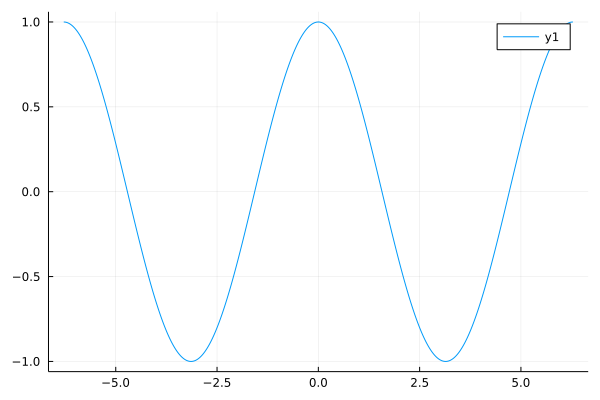

In [14]:
using Plots
x = LinRange(-2π, 2π, 1024)
y = cos.(x)
plot(x, y)

Timing code via `@time`

In [15]:
@time rand(30, 30);

  0.000022 seconds (1 allocation: 7.188 KiB)


Wanted to compare it with generating a same size of a similar matrix with python. Julia is ~10 times faster for this specific comparison

In [22]:
; ipython rand.ipy

CPU times: user 148 µs, sys: 50 µs, total: 198 µs
Wall time: 107 µs


Just to show what rand.ipy contains:

In [17]:
; cat rand.ipy

import numpy as np

%time np.random.random((30, 30))


Can show docs via `@doc`

In [31]:
@doc LinRange(-2π, 2π, 1024)

```
LinRange{T}
```

A range with `len` linearly spaced elements between its `start` and `stop`. The size of the spacing is controlled by `len`, which must be an `Int`.

# Examples

```jldoctest
julia> LinRange(1.5, 5.5, 9)
9-element LinRange{Float64}:
 1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5
```

Compared to using [`range`](@ref), directly constructing a `LinRange` should have less overhead but won't try to correct for floating point errors:

```julia
julia> collect(range(-0.1, 0.3, length=5))
5-element Array{Float64,1}:
 -0.1
  0.0
  0.1
  0.2
  0.3

julia> collect(LinRange(-0.1, 0.3, 5))
5-element Array{Float64,1}:
 -0.1
 -1.3877787807814457e-17
  0.09999999999999999
  0.19999999999999998
  0.3
```
